<a href="https://colab.research.google.com/github/dkd99/Seoul-Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet



from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/MyDrive/csv files/SeoulBikeData.csv',encoding='unicode_escape')

In [4]:
df.shape

(8760, 14)

In [5]:
len(df[df['Date']==''])

0

In [6]:
df['Date']=df['Date'].apply(lambda x : datetime.strptime(x,'%d/%m/%Y'))

In [7]:
df['month']=df['Date'].dt.month

In [8]:
df.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [10]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),month
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,6.526027
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,3.448048
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,1.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,4.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,7.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,10.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,12.000000


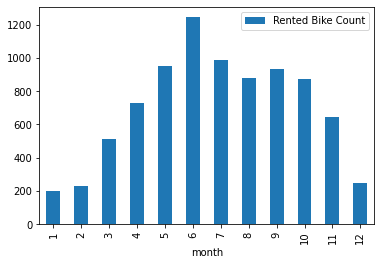

In [11]:
df.groupby(df['month']).aggregate({'Rented Bike Count':'mean'}).plot(kind='bar')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


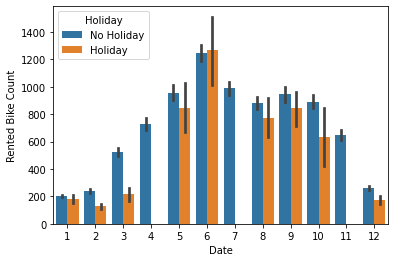

In [12]:
sns.barplot(df['Date'].dt.month,'Rented Bike Count',data=df,hue='Holiday')

In [13]:
numeric_features=df.describe().columns.tolist()

In [14]:
numeric_features

['Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'month']

In [15]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
month                        0
dtype: int64

In [16]:
df['Date'].value_counts().sort_values()

2017-12-01    24
2017-12-05    24
2017-12-06    24
2017-12-07    24
2017-12-08    24
              ..
2018-11-29    24
2018-11-10    24
2018-09-03    24
2018-11-07    24
2018-11-30    24
Name: Date, Length: 365, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'Total rented bike in respective hour'),
 Text(0.5, 0, 'time of day'),
 Text(0.5, 1.0, 'Demand wrt time of day')]

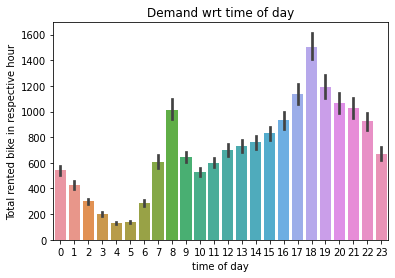

In [17]:
sns.barplot('Hour','Rented Bike Count',data=df).set(title='Demand wrt time of day',xlabel='time of day',ylabel='Total rented bike in respective hour')

In [18]:
df['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [19]:
df.groupby('Seasons').aggregate({'Rented Bike Count':'mean'})

,Rented Bike Count
Seasons,
Autumn,819.597985
Spring,730.031250
Summer,1034.073370
Winter,225.541204


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


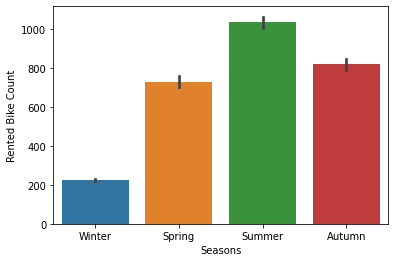

In [20]:
sns.barplot('Seasons','Rented Bike Count',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


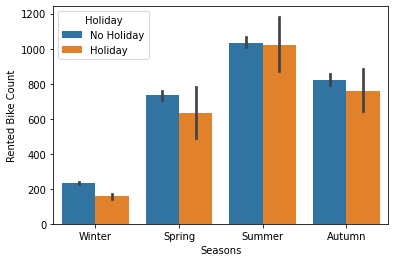

In [21]:
sns.barplot('Seasons','Rented Bike Count',data=df,hue='Holiday')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'avg rented bikes on holidays vs no holidays')]

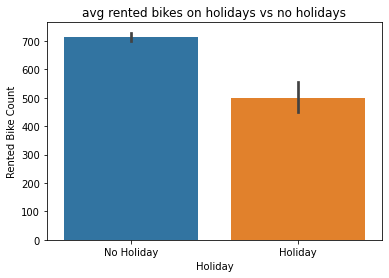

In [22]:
sns.barplot('Holiday','Rented Bike Count',data=df).set(title='avg rented bikes on holidays vs no holidays')

In [23]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'month'],
      dtype='object')

In [24]:
df['Date'].dt.dayofweek

0       4
1       4
2       4
3       4
4       4
       ..
8755    4
8756    4
8757    4
8758    4
8759    4
Name: Date, Length: 8760, dtype: int64

In [25]:
df['Date'].dt.dayofweek.value_counts()

4    1272
5    1248
6    1248
0    1248
1    1248
2    1248
3    1248
Name: Date, dtype: int64

[Text(0.5, 1.0, 'variation of demand on different days of week')]

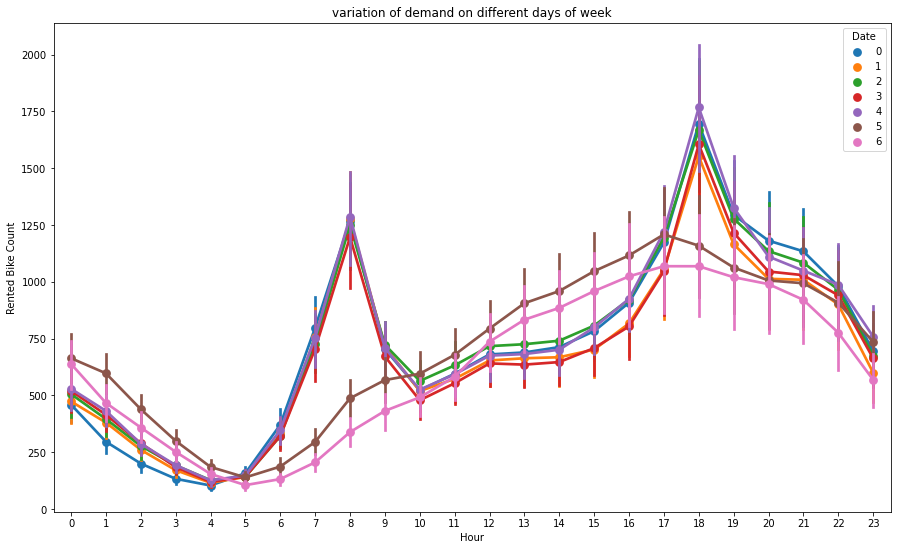

In [29]:
plt.figure(figsize=(15,9))
sns.pointplot(x='Hour',y='Rented Bike Count',data=df,hue=df['Date'].dt.dayofweek).set(title='variation of demand on different days of week')

[Text(0.5, 1.0, 'avg rented bikes on holidays vs no holidays')]

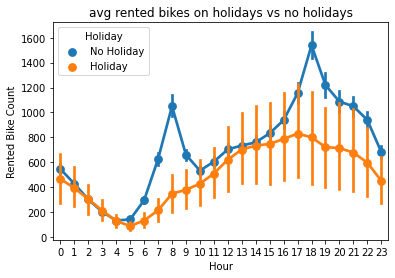

In [30]:
sns.pointplot(x='Hour',y='Rented Bike Count',data=df,hue='Holiday').set(title='avg rented bikes on holidays vs no holidays')

In [31]:
df.columns


Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'month'],
      dtype='object')

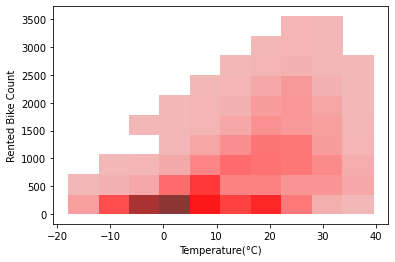

In [32]:
sns.histplot(data=df,x='Temperature(°C)',y='Rented Bike Count',bins=10,color='red',)



In [33]:
print(numeric_features,end='')

['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'month']

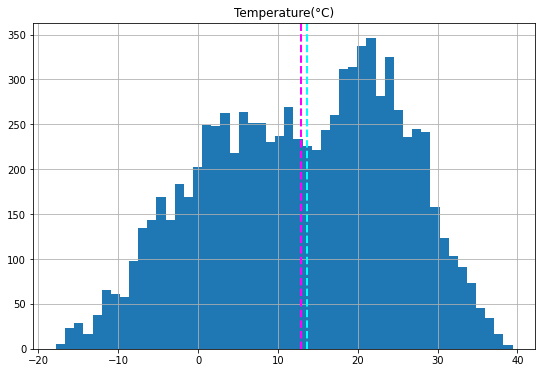

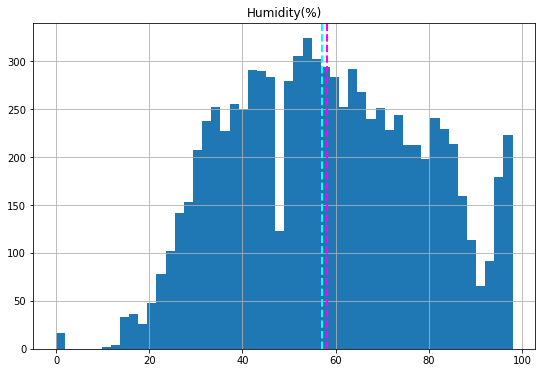

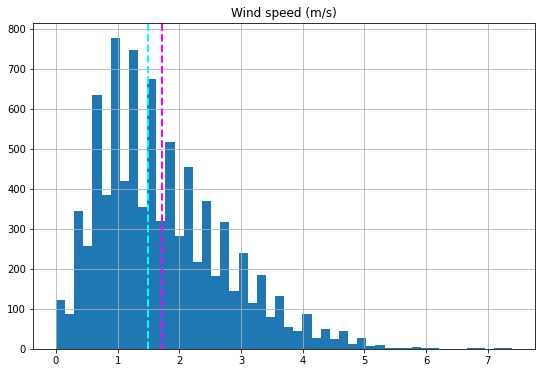

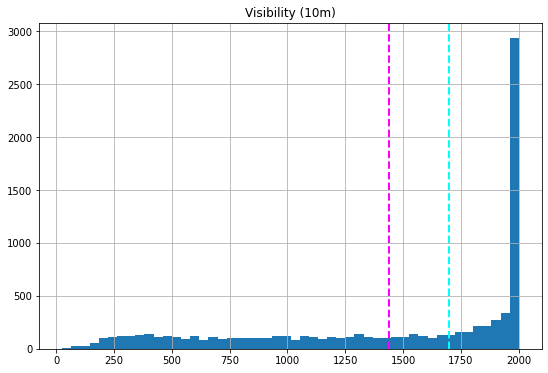

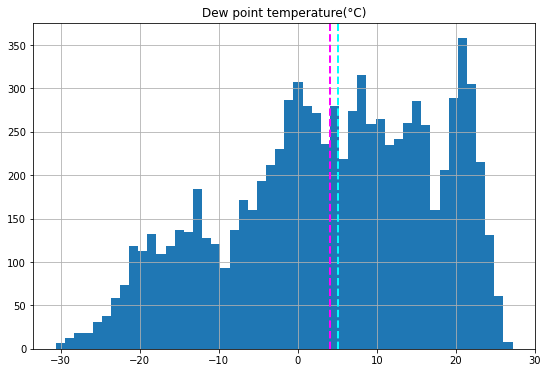

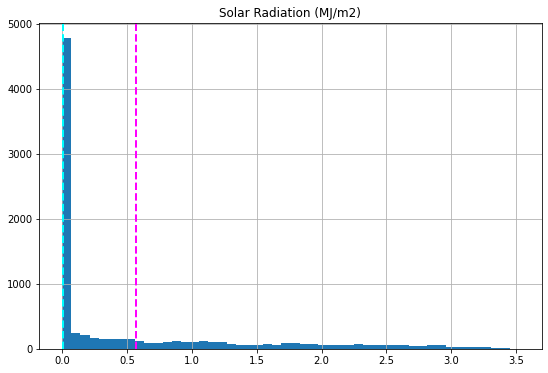

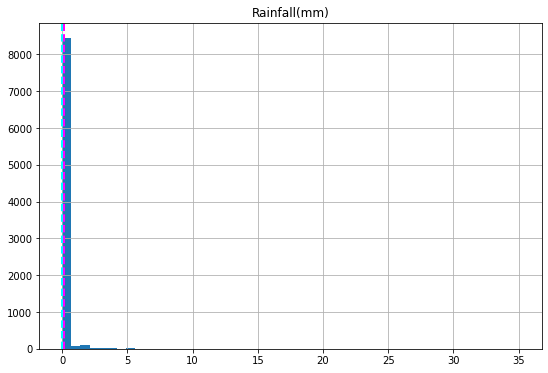

In [34]:
from seaborn.distributions import kdeplot
for col in numeric_features[2:-2]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2) 
      
       
    ax.set_title(col)
    
plt.show()


In [36]:
right_skewed=['Wind speed (m/s)','Solar Radiation (MJ/m2)', 'Rainfall(mm)']
left_skewed=['Visibility (10m)', 'Dew point temperature(°C)']

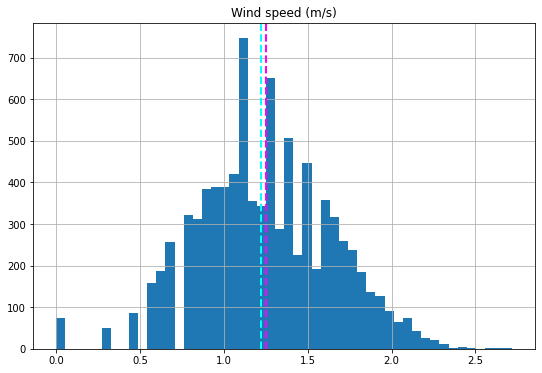

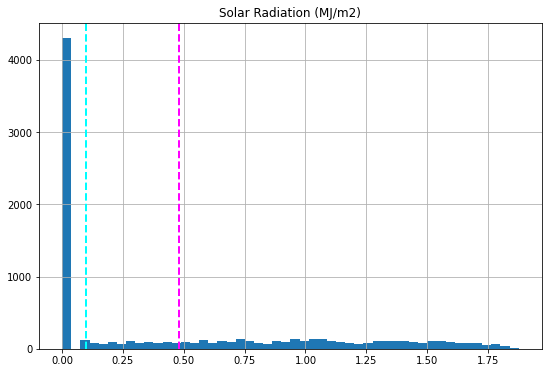

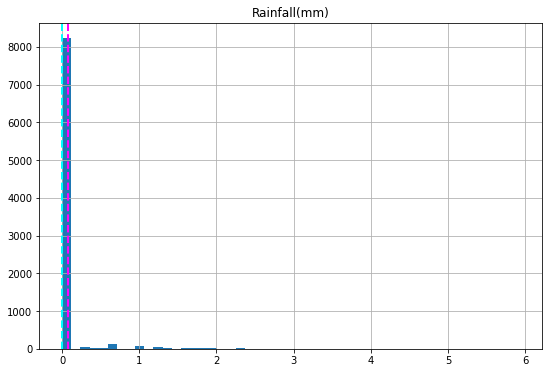

In [37]:
for col in right_skewed:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = np.sqrt(df[col])
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

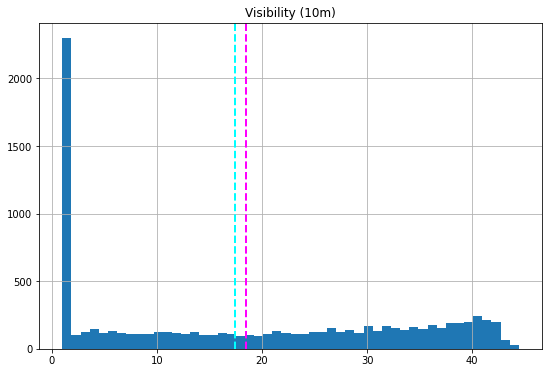

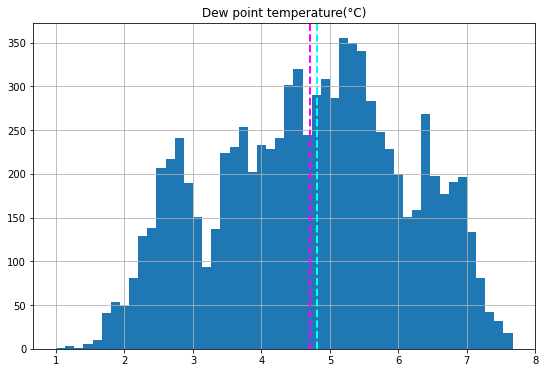

In [38]:
for col in left_skewed:
  fig = plt.figure(figsize=(9, 6))
  ax = fig.gca()
  feature = np.sqrt(max(df[col]+1) - df[col])
  feature.hist(bins=50, ax = ax)
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
  ax.set_title(col)
plt.show()

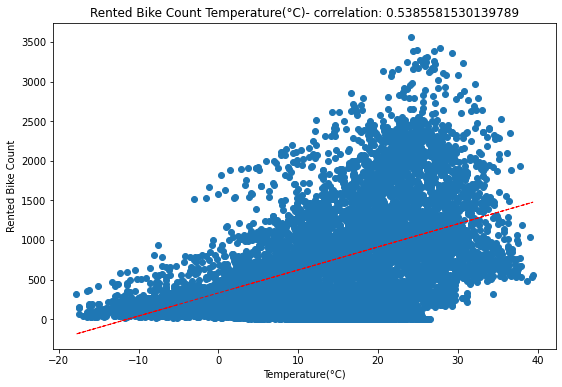

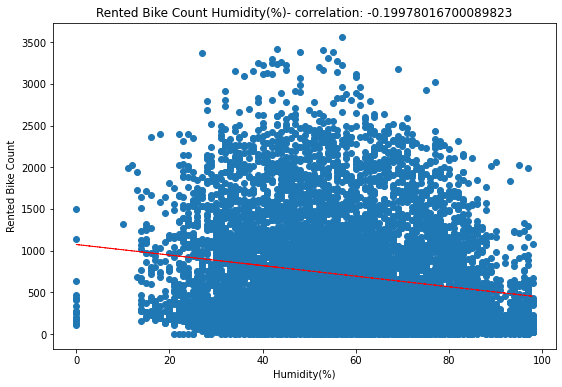

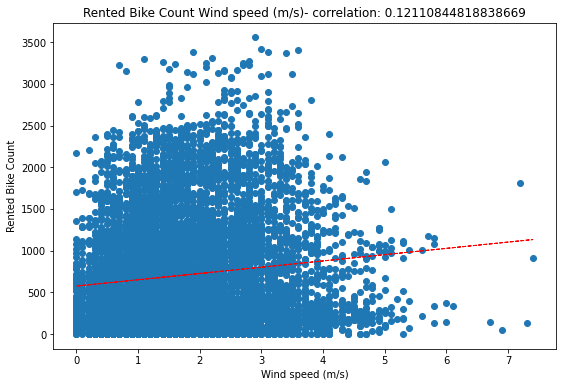

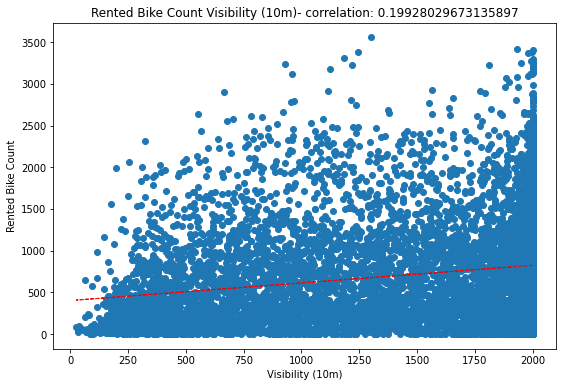

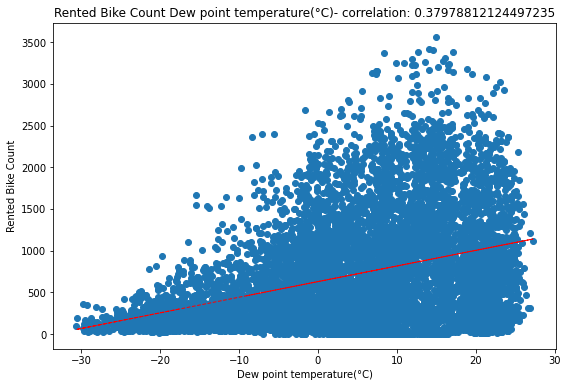

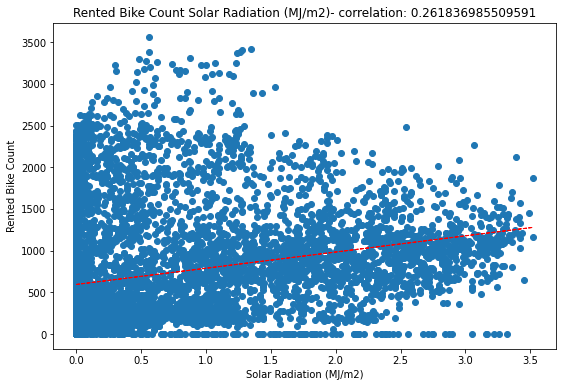

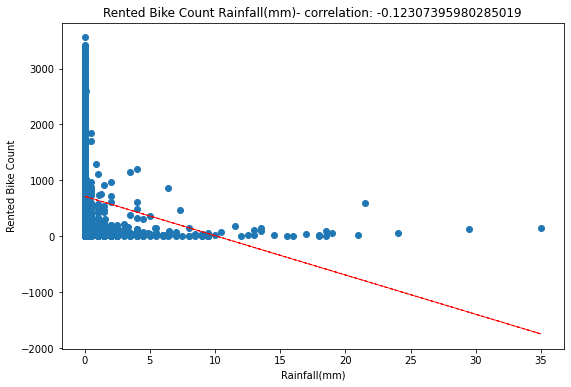

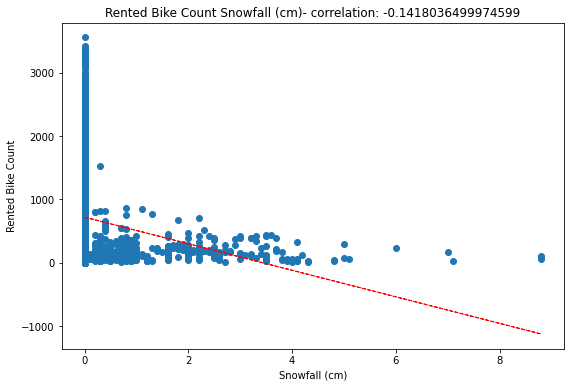

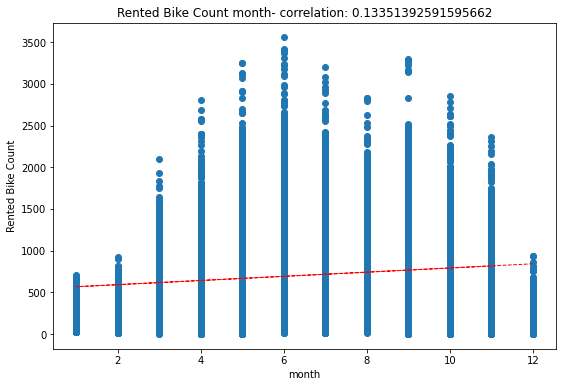

In [39]:
for col in numeric_features[2:]:
   fig = plt.figure(figsize=(9, 6))
   ax = fig.gca()
   feature = df[col]
   label = df['Rented Bike Count']
   correlation = feature.corr(label)
   plt.scatter(x=feature, y=label)
   plt.xlabel(col)
 
   plt.ylabel('Rented Bike Count')
   ax.set_title('Rented Bike Count ' + col + '- correlation: ' + str(correlation))
   z = np.polyfit(df[col], df['Rented Bike Count'], 1)
   y_hat = np.poly1d(z)(df[col])
 
   plt.plot(df[col], y_hat, "r--", lw=1)
 
plt.show()

In [40]:
df['Rented Bike Count'].describe()

count    8760.000000
mean      704.602055
std       644.997468
min         0.000000
25%       191.000000
50%       504.500000
75%      1065.250000
max      3556.000000
Name: Rented Bike Count, dtype: float64

In [41]:
len(df[df['Rented Bike Count']==0])

295

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


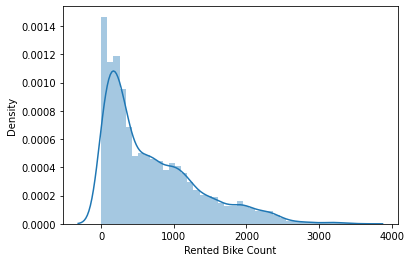

In [42]:
sns.distplot(df['Rented Bike Count'],hist=True)

In [43]:
df['Rented Bike Count']=np.where(df['Rented Bike Count']==0,1,df['Rented Bike Count'])

In [44]:
len(df[df['Rented Bike Count']==1])

295

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


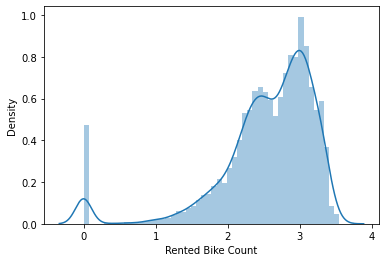

In [45]:
sns.distplot(np.log10(df['Rented Bike Count']),hist=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


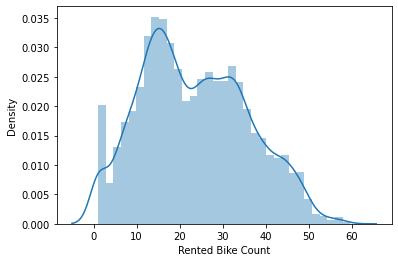

In [46]:
sns.distplot(np.sqrt(df['Rented Bike Count']),hist=True)

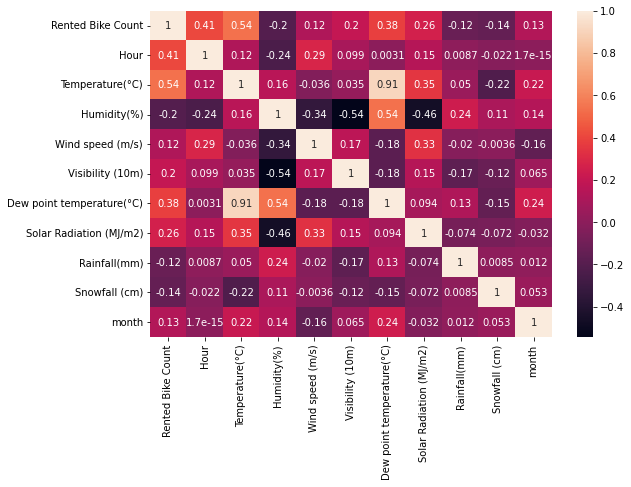

In [47]:
plt.figure(figsize=(9,6))
sns.heatmap(df[numeric_features].corr(),annot=True)

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [49]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count']]])

,variables,VIF
0,Hour,4.425156
1,Temperature(°C),34.345199
2,Humidity(%),6.776495
3,Wind speed (m/s),4.877759
4,Visibility (10m),9.356009
5,Dew point temperature(°C),17.435051
6,Solar Radiation (MJ/m2),2.882197
7,Rainfall(mm),1.081894
8,Snowfall (cm),1.131825
9,month,5.093120


In [50]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Temperature(°C)','Dew point temperature(°C)','Rented Bike Count']]])

,variables,VIF
0,Hour,3.890690
1,Humidity(%),5.128209
2,Wind speed (m/s),4.461240
3,Visibility (10m),5.338879
4,Solar Radiation (MJ/m2),1.749875
5,Rainfall(mm),1.079212
6,Snowfall (cm),1.054868
7,month,4.915092


In [51]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Temperature(°C)','Dew point temperature(°C)','Rented Bike Count','Visibility (10m)','Humidity(%)']]])

,variables,VIF
0,Hour,3.579718
1,Wind speed (m/s),3.601347
2,Solar Radiation (MJ/m2),1.629981
3,Rainfall(mm),1.021807
4,Snowfall (cm),1.038179
5,month,2.578615


In [52]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Temperature(°C)','Dew point temperature(°C)','Rented Bike Count','Visibility (10m)','Humidity(%)']]])

,variables,VIF
0,Hour,3.579718
1,Wind speed (m/s),3.601347
2,Solar Radiation (MJ/m2),1.629981
3,Rainfall(mm),1.021807
4,Snowfall (cm),1.038179
5,month,2.578615


In [53]:
independent_features=['Wind speed (m/s)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']

In [54]:
categorical_data=df.describe(include=['object']).columns.tolist()

In [55]:
categorical_data

['Seasons', 'Holiday', 'Functioning Day']

In [56]:
df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

In [57]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'month'],
      dtype='object')

In [58]:
df.groupby('Functioning Day').aggregate({'Rented Bike Count':['mean','max','min']})

Rented Bike Count          
                             mean   max min
Functioning Day                            
No                       1.000000     1   1
Yes                    729.156999  3556   2

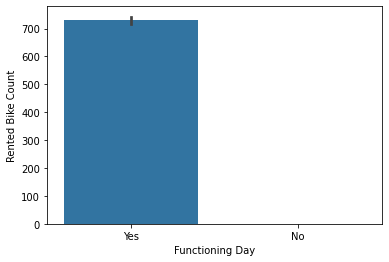

In [59]:
sns.barplot(x='Functioning Day',y='Rented Bike Count',data=df)

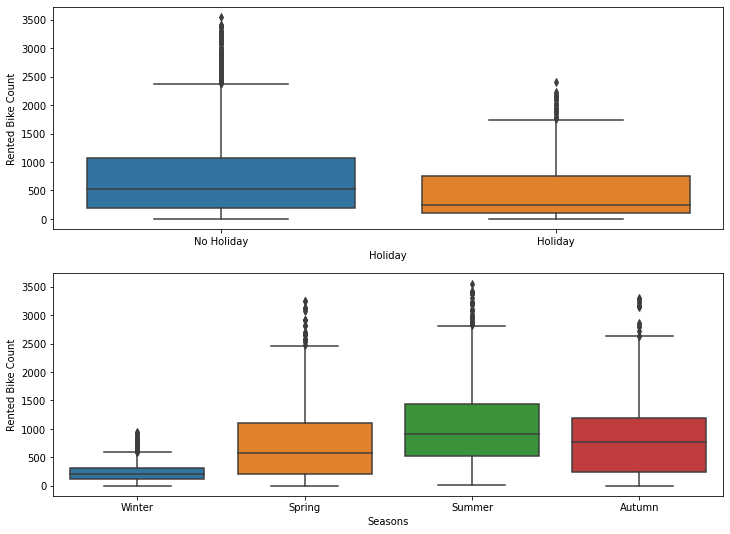

In [60]:
fig=plt.figure(1,figsize=(12,9))
plt.subplot(211)
sns.boxplot(data=df,x='Holiday',y='Rented Bike Count')
plt.subplot(212)
sns.boxplot(data=df,x='Seasons',y='Rented Bike Count')



[Text(0.5, 1.0, 'Varition of rented bike counts on different hours of days')]

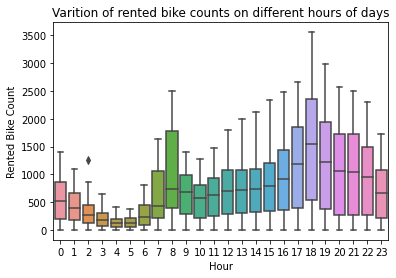

In [62]:
sns.boxplot(x='Hour',y='Rented Bike Count',data=df).set(title='Varition of rented bike counts on different hours of days')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

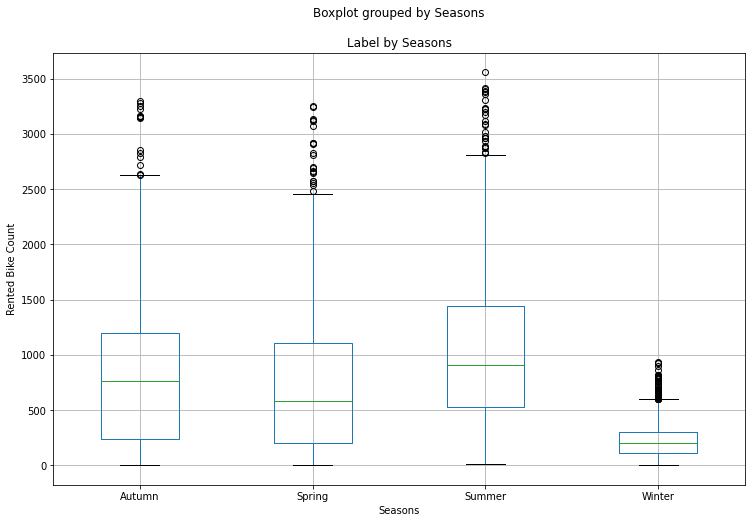

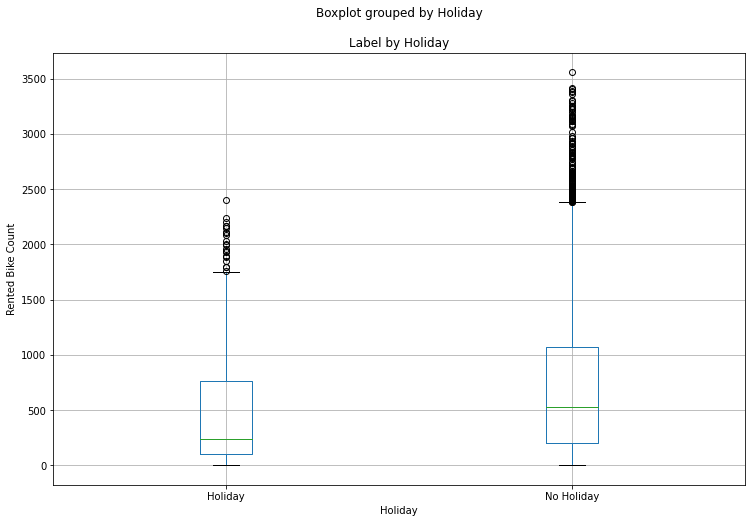

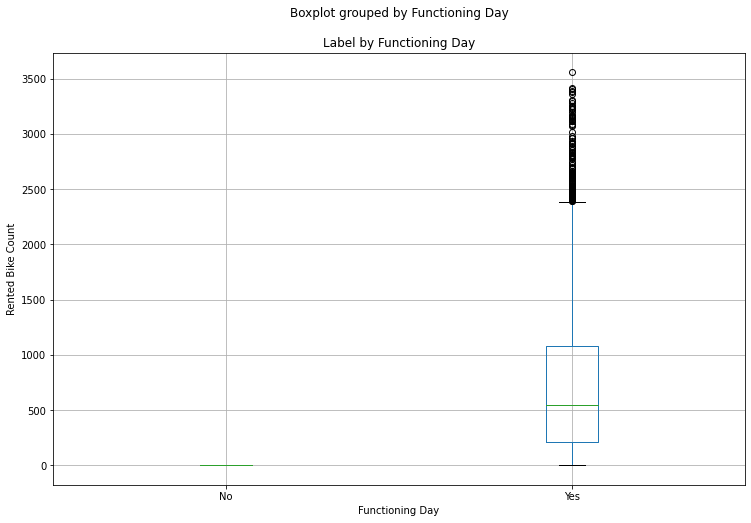

In [63]:
for col in categorical_data:
    fig = plt.figure(figsize=(12, 8))
    ax = fig.gca()
    df.boxplot(column = 'Rented Bike Count', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Rented Bike Count")
plt.show()

In [64]:
df.describe().columns.tolist()

['Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'month']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


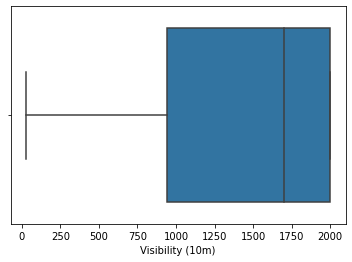

In [65]:
sns.boxplot(df['Visibility (10m)'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


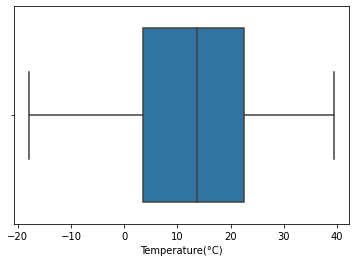

In [60]:
sns.boxplot(df['Temperature(°C)'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


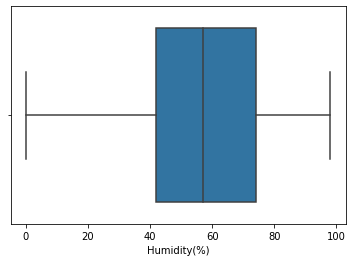

In [66]:
sns.boxplot(df['Humidity(%)'])

In [67]:
len(df[df['Rainfall(mm)']>np.mean(df[df['Rainfall(mm)']!=0]['Rainfall(mm)'])])

150

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


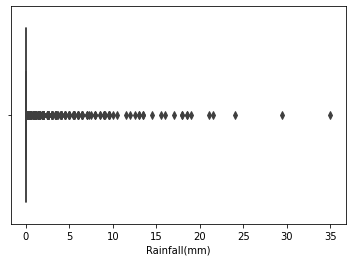

In [68]:
sns.boxplot(df['Rainfall(mm)'])

In [69]:
len(df[df['Snowfall (cm)']>np.mean(df[df['Snowfall (cm)']!=0]['Snowfall (cm)'])])

171

In [70]:
np.mean(df[df['Snowfall (cm)']!=0]['Snowfall (cm)'])

1.4844243792325036

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


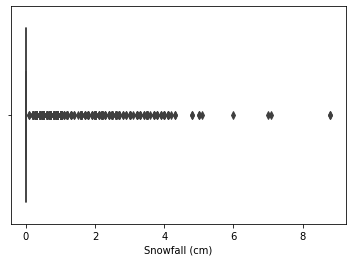

In [71]:
sns.boxplot(df['Snowfall (cm)'])

In [72]:
def zscore(series): 
    return (series-series.mean())/series.std()

df['count_zscore'] = np.sqrt(df['Rented Bike Count']).transform(zscore)
outlier_idx = np.abs(df['count_zscore'])>3
outlier_data = df.loc[outlier_idx, :]
print('Shape of the outlier data entries: ', outlier_data.shape)
outlier_data

Shape of the outlier data entries:  (0, 16)


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,count_zscore


In [73]:
df_copy=pd.get_dummies(data=df,columns=['Holiday','Seasons','Hour','month','Functioning Day'])

In [74]:
df_copy.head()

,Date,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),...,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,Functioning Day_No,Functioning Day_Yes
0,2017-12-01,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,1
1,2017-12-01,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,1
2,2017-12-01,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,1
3,2017-12-01,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,1
4,2017-12-01,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,1


In [75]:
df_copy.columns

Index(['Date', 'Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)',
       'count_zscore', 'Holiday_Holiday', 'Holiday_No Holiday',
       'Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'Hour_0', 'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6',
       'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12',
       'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18',
       'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23', 'month_1',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'Functioning Day_No', 'Functioning Day_Yes'],
      dtype='object')

In [76]:
independent_features.extend(['Temperature(°C)','Humidity(%)','Visibility (10m)','Holiday_Holiday','Functioning Day_Yes','Seasons_Spring','Seasons_Summer','Seasons_Winter','Hour_1','Hour_2','Hour_3','Hour_4','Hour_5','Hour_6','Hour_7','Hour_8','Hour_9','Hour_10','Hour_11','Hour_12','Hour_13','Hour_14','Hour_15','Hour_16','Hour_17','Hour_18','Hour_19','Hour_20','Hour_21','Hour_22','Hour_23', 'month_2','month_3','month_4','month_5', 'month_6','month_7', 'month_8', 'month_9','month_10','month_11', 'month_12'])

In [77]:
independent_features

['Wind speed (m/s)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Temperature(°C)',
 'Humidity(%)',
 'Visibility (10m)',
 'Holiday_Holiday',
 'Functioning Day_Yes',
 'Seasons_Spring',
 'Seasons_Summer',
 'Seasons_Winter',
 'Hour_1',
 'Hour_2',
 'Hour_3',
 'Hour_4',
 'Hour_5',
 'Hour_6',
 'Hour_7',
 'Hour_8',
 'Hour_9',
 'Hour_10',
 'Hour_11',
 'Hour_12',
 'Hour_13',
 'Hour_14',
 'Hour_15',
 'Hour_16',
 'Hour_17',
 'Hour_18',
 'Hour_19',
 'Hour_20',
 'Hour_21',
 'Hour_22',
 'Hour_23',
 'month_2',
 'month_3',
 'month_4',
 'month_5',
 'month_6',
 'month_7',
 'month_8',
 'month_9',
 'month_10',
 'month_11',
 'month_12']

In [78]:
X=df_copy[independent_features]

In [79]:
Y=np.sqrt(df_copy['Rented Bike Count'])

In [135]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [81]:
from sklearn.preprocessing import PowerTransformer

In [82]:
yeo=PowerTransformer()
X_train=yeo.fit_transform(X_train)
X_test=yeo.transform(X_test)

In [83]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [84]:
regressor.intercept_

23.564253277419084

In [85]:
regressor.coef_

array([-9.89450737e-02,  3.06646976e+00, -3.04073895e+00,  3.88110318e-02,
        4.84867230e+00, -1.23233947e+00,  4.70996596e-01, -6.82321364e-01,
        4.77093439e+00,  6.66336936e+12,  2.93122512e+12,  9.17337986e+12,
       -5.11765727e-01, -1.11314242e+00, -1.40056733e+00, -2.02481348e+00,
       -1.88907786e+00, -9.22178850e-01,  7.57447129e-02,  9.37145605e-01,
       -4.76702434e-01, -1.50301667e+00, -1.51952036e+00, -1.25863982e+00,
       -1.31413184e+00, -1.28040897e+00, -1.03150510e+00, -5.99346071e-01,
        2.61011207e-01,  1.72656867e+00,  1.31851566e+00,  1.19520036e+00,
        1.32137347e+00,  1.00080952e+00,  2.44506951e-01, -2.22994475e-01,
        1.63944748e+12,  1.63000451e+12,  1.64213107e+12,  3.94603828e+12,
        4.01946008e+12,  4.00625431e+12,  5.79016825e+12,  5.92226714e+12,
        5.92707846e+12,  5.55542697e-01])

In [86]:
Y_pred_train = regressor.predict(X_train)

In [87]:
Y_pred = regressor.predict(X_test)

In [88]:
regressor.score(X_train,Y_train)

0.8047981938206255

In [89]:
r2_score(Y_train, Y_pred_train)

0.8047981938206255

In [90]:
r2_score(Y_test, Y_pred)

0.8070536920422309

In [91]:
MSE  = mean_squared_error((Y_test)**2, (Y_pred)**2)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((Y_test)**2,(Y_pred)**2)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((Y_test)**2,(Y_pred)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 89591.33729488969
RMSE : 299.3181205588624
R2 : 0.7851798027459912
Adjusted R2 :  0.7805686365893489


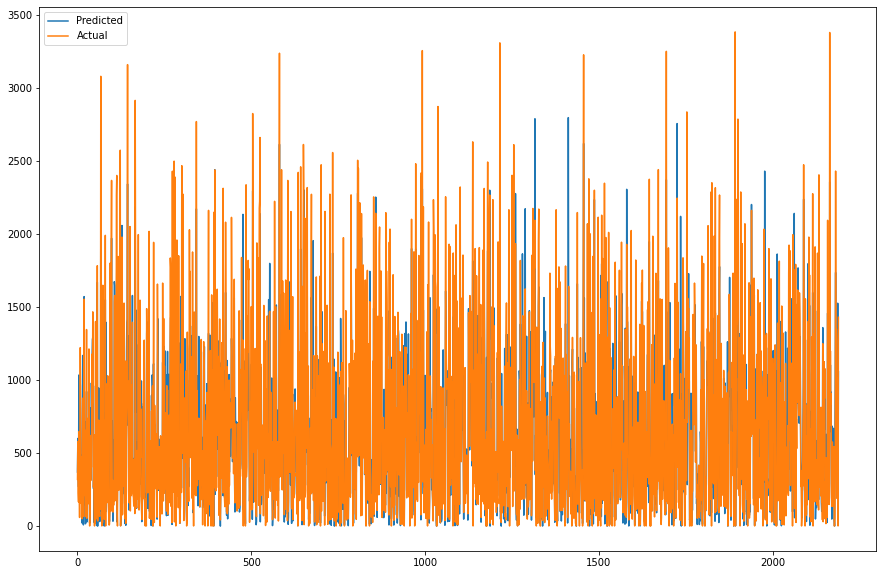

In [92]:
plt.figure(figsize=(15,10))
plt.plot((Y_pred)**2)
plt.plot((np.array(Y_test)**2))
plt.legend(["Predicted","Actual"])
plt.show()

In [93]:
L1=Lasso(alpha=0.1,max_iter=1000)
L1.fit(X_train,Y_train)

Lasso(alpha=0.1)

In [94]:
L1.coef_

array([-0.        ,  1.59015315, -3.10886146, -0.        ,  4.53981719,
       -1.33405872,  0.37619741, -0.55437512,  4.59908382, -0.        ,
       -0.        , -2.40977617, -0.29039281, -0.88553938, -1.18201688,
       -1.80500853, -1.67435991, -0.68370134,  0.21124946,  1.22613046,
        0.        , -0.73169835, -0.69041812, -0.41280711, -0.46330435,
       -0.43035707, -0.20009061,  0.        ,  0.74658724,  2.01681976,
        1.48828207,  1.23537591,  1.35712461,  1.0299058 ,  0.26945651,
       -0.19697919, -0.64597508, -0.        ,  0.63131199,  1.13599328,
       -0.11413126, -0.61982061,  0.47429537,  0.95857231,  0.46476516,
        0.30156389])

In [95]:
L1.intercept_

23.56532947475516

In [96]:
L1.score(X_train,Y_train)

0.8002094813010723

In [97]:
Y_pred_L=L1.predict(X_test)

In [98]:
r2_score(Y_test, Y_pred_L)

0.8034534318010987

In [99]:
MSE  = mean_squared_error((Y_test)**2, (Y_pred_L)**2)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((Y_test)**2,(Y_pred_L)**2)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((Y_test)**2,(Y_pred_L)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 94964.05469914775
RMSE : 308.1623836537285
R2 : 0.7722972155738205
Adjusted R2 :  0.7674095216477336


In [100]:
import warnings
warnings.filterwarnings('ignore')

In [101]:
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [102]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0001}

Using  {'alpha': 0.0001}  the negative mean squared error is:  -30.211889579718047


In [103]:
y_pred_lasso = lasso_regressor.predict(X_test)

In [104]:
MSE  = mean_squared_error((Y_test)**2, (y_pred_lasso)**2)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((Y_test)**2,(y_pred_lasso)**2)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((Y_test)**2,(y_pred_lasso)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 89588.76032952698
RMSE : 299.3138158012874
R2 : 0.7851859817385618
Adjusted R2 :  0.7805749482154511


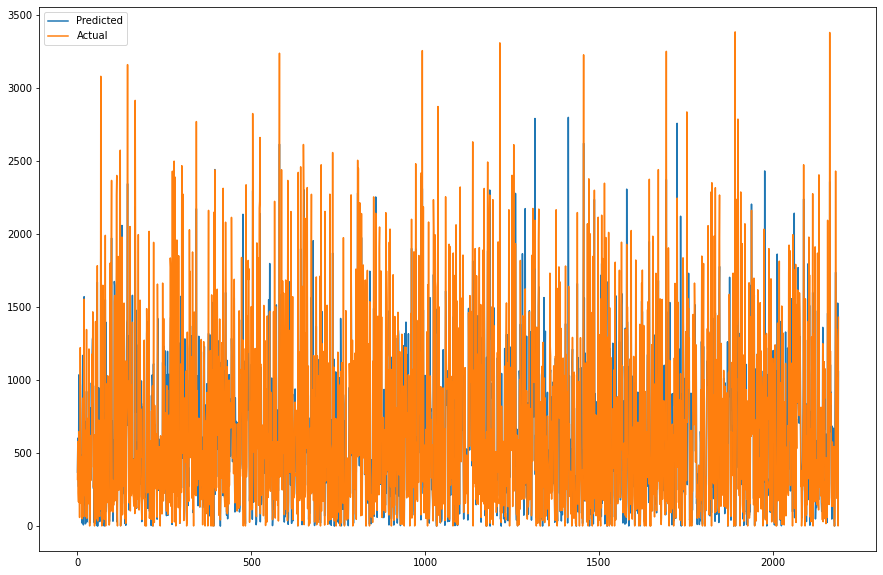

In [105]:
plt.figure(figsize=(15,10))
plt.plot((y_pred_lasso)**2)
plt.plot((np.array(Y_test)**2))
plt.legend(["Predicted","Actual"])
plt.show()

In [106]:
ridge  = Ridge(alpha=0.1)

In [107]:
ridge.fit(X_train,Y_train)

Ridge(alpha=0.1)

In [108]:
ridge.score(X_train, Y_train)

0.804801997331718

In [109]:
y_pred_ridge=ridge.predict(X_test)

In [110]:
r2_score(Y_test,y_pred_ridge)

0.8070574366070801

In [111]:
MSE  = mean_squared_error((Y_test)**2, (y_pred_ridge)**2)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((Y_test)**2,(y_pred_ridge)**2)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((Y_test)**2,(y_pred_ridge)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 89586.62453951202
RMSE : 299.31024796941387
R2 : 0.7851911028902954
Adjusted R2 :  0.7805801792939134


In [112]:
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,Y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [113]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 5}

Using  {'alpha': 5}  the negative mean squared error is:  -30.211368725540368


In [114]:
y_pred_ridge = ridge_regressor.predict(X_test)

In [115]:
MSE  = mean_squared_error((Y_test)**2, (y_pred_ridge)**2)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((Y_test)**2, (y_pred_ridge)**2)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((Y_test)**2, (y_pred_ridge)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 89608.41154098933
RMSE : 299.34664110523994
R2 : 0.7851388624829497
Adjusted R2 :  0.7805268175339136


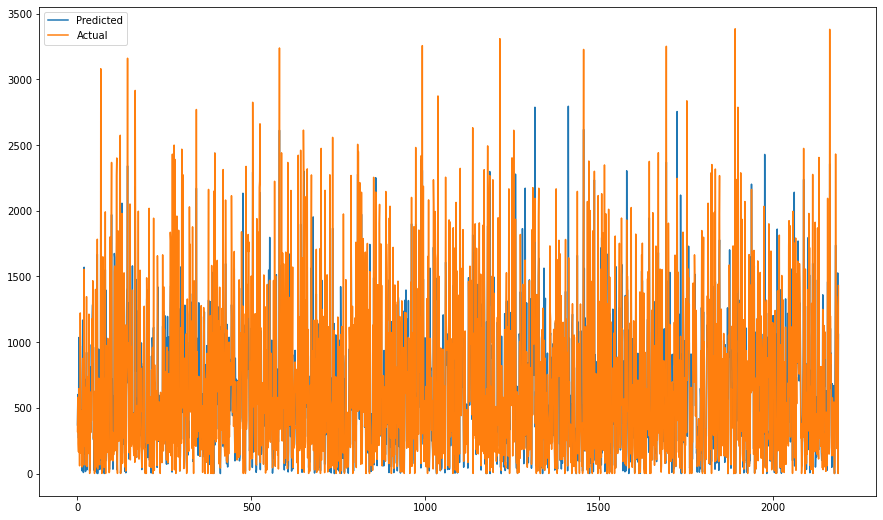

In [116]:
plt.figure(figsize=(15,9))
plt.plot((y_pred_ridge)**2)
plt.plot((np.array(Y_test)**2))
plt.legend(["Predicted","Actual"])
plt.show()

In [117]:
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [118]:
elasticnet.fit(X_train,Y_train)

ElasticNet(alpha=0.1)

In [119]:
elasticnet.score(X_train,Y_train)

0.7994785789429404

In [120]:
y_pred_elastic=elasticnet.predict(X_test)

In [121]:
r2_score(Y_test,y_pred_elastic)

0.8020979061120248

In [122]:
MSE  = mean_squared_error((Y_test)**2, (y_pred_elastic)**2)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((Y_test)**2, (y_pred_elastic)**2)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((Y_test)**2, (y_pred_elastic)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 96309.84987599254
RMSE : 310.33828296875095
R2 : 0.7690702966095271
Adjusted R2 :  0.764113336107445


In [123]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [124]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001, 'l1_ratio': 0.3}

Using  {'alpha': 0.001, 'l1_ratio': 0.3}  the negative mean squared error is:  -30.361677796303486


In [125]:
y_pred_elastic2 = elastic_regressor.predict(X_test)

In [126]:
MSE  = mean_squared_error((Y_test)**2, (y_pred_elastic2)**2)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((Y_test)**2, (y_pred_elastic2)**2)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((Y_test)**2, (y_pred_elastic2)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 89614.45048874107
RMSE : 299.35672781606405
R2 : 0.7851243824228635
Adjusted R2 :  0.7805120266559255


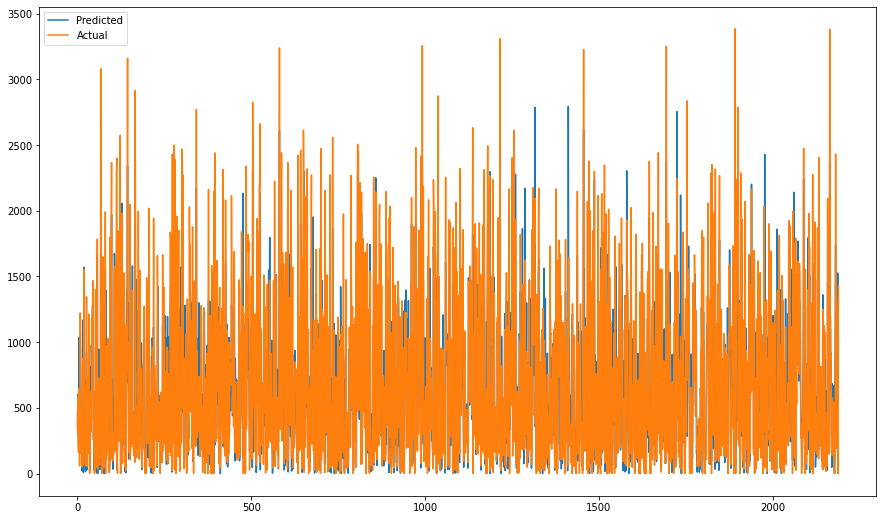

In [127]:
plt.figure(figsize=(15,9))
plt.plot((y_pred_elastic2)**2)
plt.plot((np.array(Y_test)**2))
plt.legend(["Predicted","Actual"])
plt.show()

In [128]:
from sklearn.tree import DecisionTreeRegressor

In [129]:
reg = DecisionTreeRegressor(criterion='mse', max_leaf_nodes=100, random_state=0)
reg.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='mse', max_leaf_nodes=100, random_state=0)

In [130]:
y_pred=reg.predict(X_test)

In [131]:
reg.score(X_train,Y_train)

0.8620062187646558

In [132]:
r2_score(Y_test,y_pred)

0.8243535659882589

In [155]:
MSE  = mean_squared_error((Y_test)**2, (y_pred)**2)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((Y_test)**2, (y_pred)**2)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((Y_test)**2, (y_pred)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 86377.15741491274
RMSE : 293.899910539137
R2 : 0.7928866946919595
Adjusted R2 :  0.7884409587870739


In [133]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

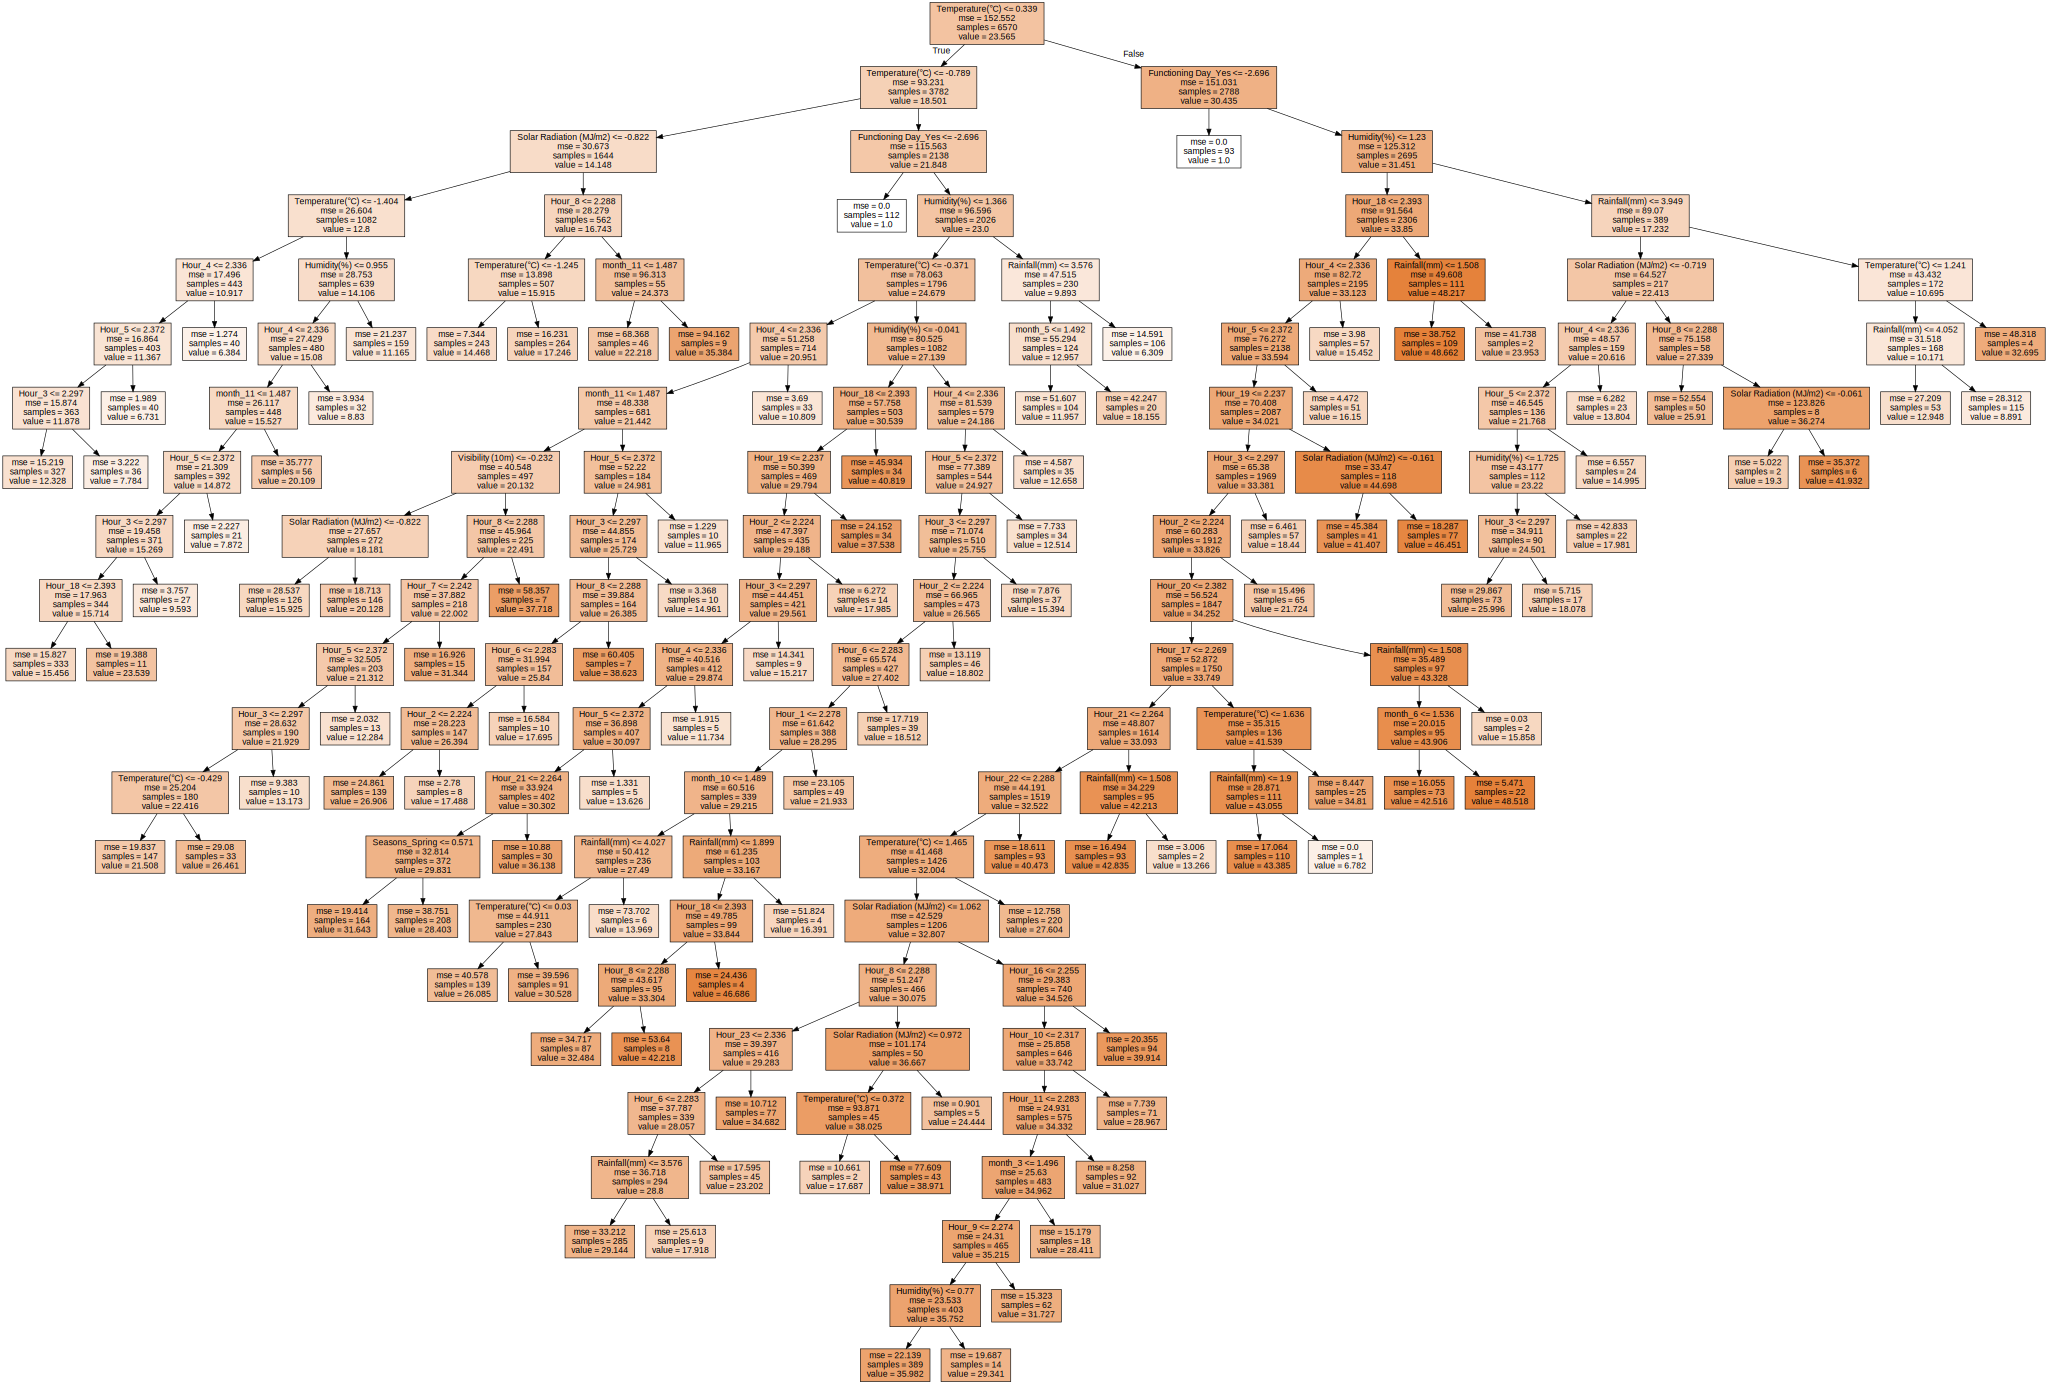

In [136]:
graph = Source(tree.export_graphviz(reg, out_file=None, feature_names=X_train.columns,filled= True))
display(SVG(graph.pipe(format='svg')))

In [141]:
reg=DecisionTreeRegressor()
parameters={'max_leaf_nodes':[10,50,100,500,1000,10000,20000],'max_depth':[4,5,6,7,8,9,10]}
dt_regressor = GridSearchCV(reg, parameters, scoring='r2', cv=50)
dt_regressor.fit(X_train, Y_train)

GridSearchCV(cv=50, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9, 10],
                         'max_leaf_nodes': [10, 50, 100, 500, 1000, 10000,
                                            20000]},
             scoring='r2')

In [144]:
print("The best fit alpha value is found out to be :" ,dt_regressor.best_params_)
print("\nUsing ",dt_regressor.best_params_, " r2_score is: ", dt_regressor.best_score_)

The best fit alpha value is found out to be : {'max_depth': 10, 'max_leaf_nodes': 100}

Using  {'max_depth': 10, 'max_leaf_nodes': 100}  r2_score is:  0.7543407942633378


In [143]:
dt_regressor.fit(X_train,Y_train)
print(dt_regressor.score(X_train,Y_train))
y_predicted_dt=dt_regressor.predict(X_test)
y_train_pred=dt_regressor.predict(X_train)
print(r2_score((Y_train)**2,(y_train_pred)**2))
r2_score((Y_test)**2,(y_predicted_dt)**2)

0.7989588618645436
0.7320744001481772


0.7027507263797785

In [171]:
MSE  = mean_squared_error((Y_test)**2, (y_predicted_dt)**2)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((Y_test)**2, (y_predicted_dt)**2)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((Y_test)**2, (y_predicted_dt)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 123968.6038556286
RMSE : 352.09175488163396
R2 : 0.7027507263797785
Adjusted R2 :  0.6963702006744448


In [178]:
features = X_train.columns
importances = dt_regressor.best_estimator_.feature_importances_
indices = np.argsort(importances)

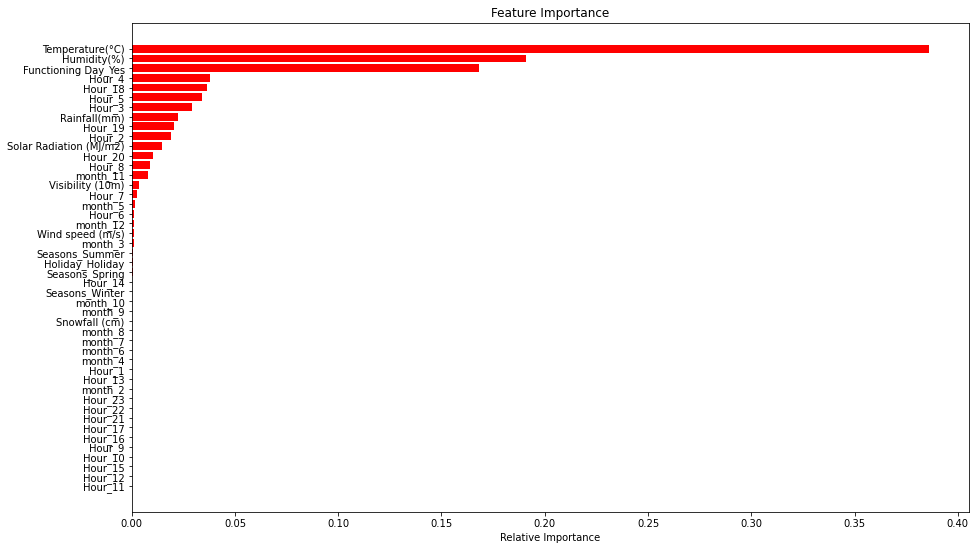

In [181]:
plt.figure(figsize=(15,9))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

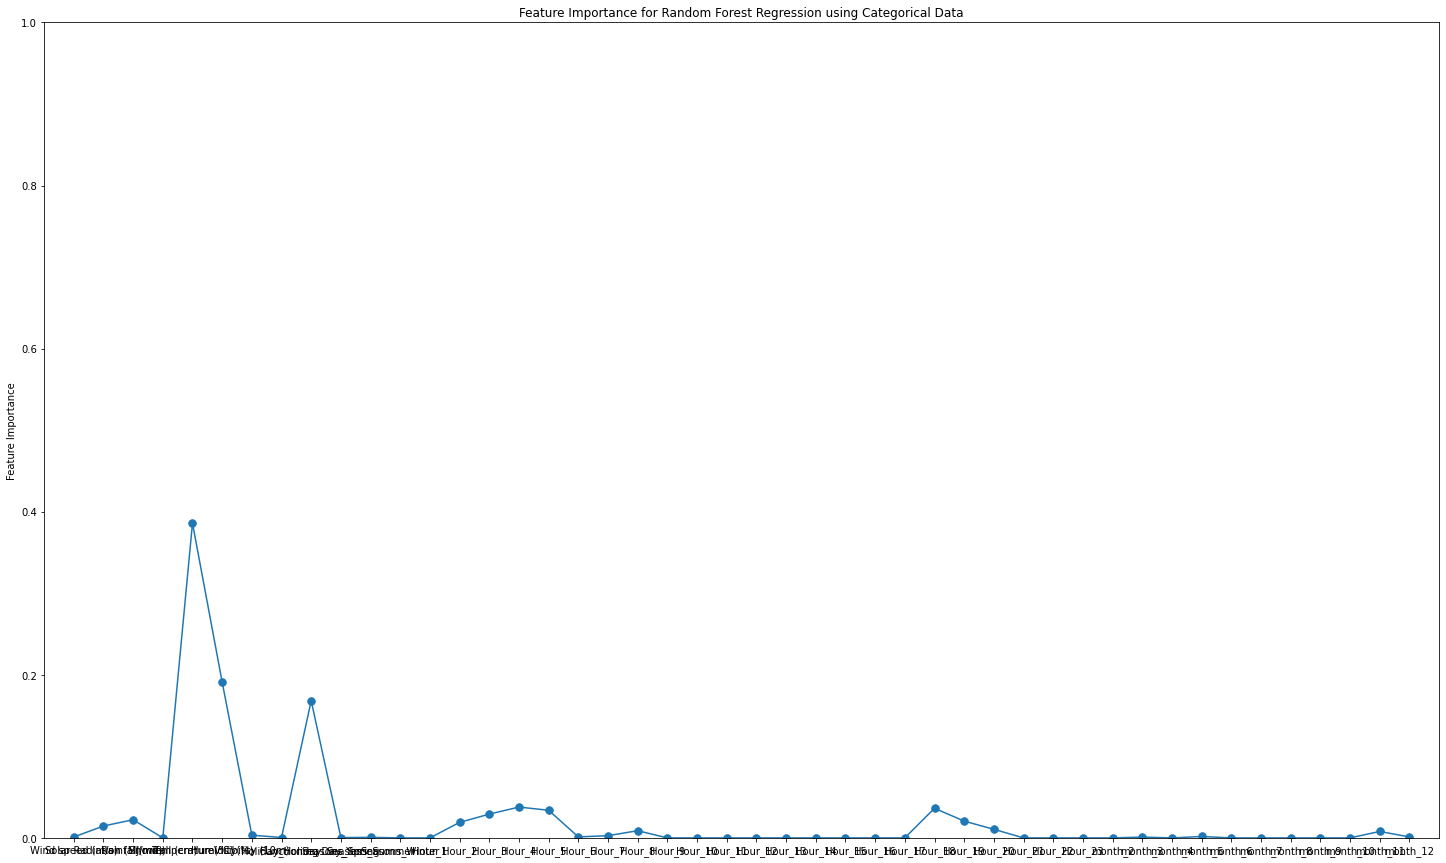

In [188]:
fig = plt.figure(figsize=(25, 15))
axes = fig.add_subplot(1, 1, 1)
axes.plot(dt_regressor.best_estimator_.feature_importances_, marker='.', markersize=15)
plt.xticks(range(len(dt_regressor.best_estimator_.feature_importances_)), X_train.columns)
axes.set(ylabel='Feature Importance', title='Feature Importance for Random Forest Regression using Categorical Data')
axes.set(xlim=[-1, len(X_train.columns)], ylim=[0, 1])

plt.show()

In [145]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [146]:
classifier=RandomForestRegressor()
grid_values={'n_estimators':[50,100,80,150,200],'max_leaf_nodes':[10,100,200,400],'max_depth':[4,5,6,7,8,9,10]}
classifier=GridSearchCV(classifier,param_grid=grid_values,scoring='neg_mean_squared_error',cv=5)
classifier.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9, 10],
                         'max_leaf_nodes': [10, 100, 200, 400],
                         'n_estimators': [50, 100, 80, 150, 200]},
             scoring='neg_mean_squared_error')

In [147]:
classifier.score(X_train,Y_train)

-19.938687172703155

In [203]:
classifier.best_estimator_.score(X_train,Y_train)

0.8692993029622267

In [148]:
y_pred_test=classifier.predict(X_train)

In [149]:
r2_score(Y_train,y_pred_test)

0.8692993029622267

In [159]:
r2_score(Y_train**2,y_pred_test**2)

0.8156137256044289

In [150]:
Y_pred_rf=classifier.predict(X_test)

In [151]:
r2_score(Y_test,Y_pred_rf)

0.8326000056473893

In [152]:
print("The best fit alpha value is found out to be :" ,classifier.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " r2_score is: ", classifier.best_score_)

The best fit alpha value is found out to be : {'max_depth': 10, 'max_leaf_nodes': 400, 'n_estimators': 150}

Using  {'alpha': 0.0001}  r2_score is:  -25.692552752939054


In [158]:
MSE  = mean_squared_error((Y_test)**2, (Y_pred_rf)**2)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((Y_test)**2, (Y_pred_rf)**2)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((Y_test)**2, (Y_pred_rf)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 92199.14297300206
RMSE : 303.6431177764483
R2 : 0.778926861925069
Adjusted R2 :  0.7741814749201941


In [161]:
[int(x) for x in np.linspace(10,110,num=3)]

[10, 60, 110]

In [162]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators=[200,1000,1600,2000]
max_features=['auto']
max_depth=[10,50,400]
min_samples_split=[2,5,10]
min_samples_leaf=[1,2,4]
bootstrap=[True,False]
random_grid={'n_estimators':n_estimators,'max_features':max_features,'max_depth':max_depth,'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf,'bootstrap':bootstrap}


In [163]:
rf=RandomForestRegressor()
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=5,cv=3,verbose=2,random_state=42,n_jobs=-1,scoring='neg_mean_squared_error')
rf_random.fit(X_train,Y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=5, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 50, 400],
                                        'max_features': ['auto'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 1000, 1600,
                                                         2000]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [164]:
rf_random.score(X_train,Y_train)

-20.28943690167614

In [165]:
y_predict_rf1=rf_random.predict(X_test)

In [167]:
y_train_predict_rf1=rf_random.predict(X_train)

In [168]:
r2_score(Y_train,y_train_predict_rf1)

0.8670000927050268

In [166]:
r2_score(Y_test,y_predict_rf1)

0.83108149439581

In [170]:
MSE  = mean_squared_error((Y_test)**2, (y_predict_rf1)**2)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((Y_test)**2, (y_predict_rf1)**2)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((Y_test)**2, (y_predict_rf1)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 92689.43308723766
RMSE : 304.44939331067434
R2 : 0.7777512547488404
Adjusted R2 :  0.7729806330588949


In [189]:
features = X_train.columns
importances = rf_random.best_estimator_.feature_importances_
indices = np.argsort(importances)

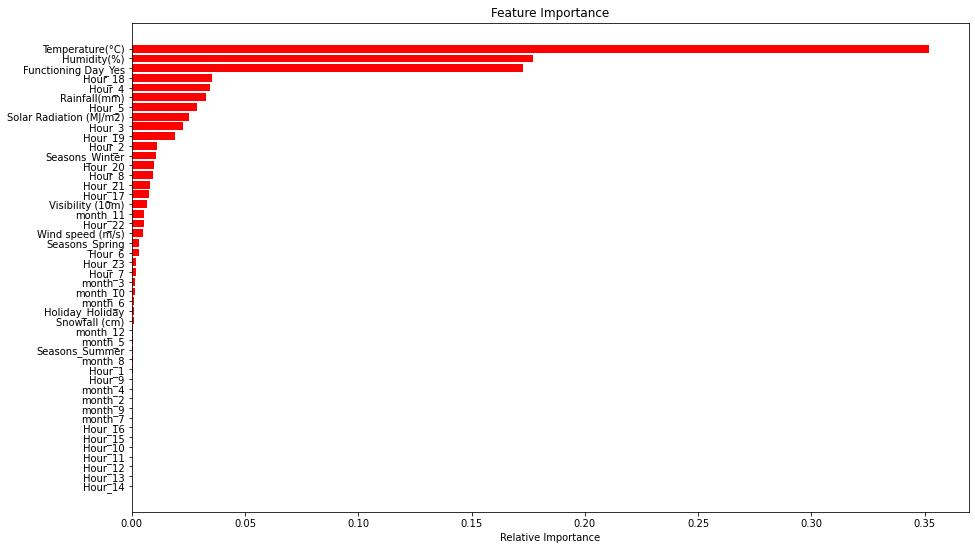

In [190]:
plt.figure(figsize=(15,9))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

In [210]:
regressor_gbm=GradientBoostingRegressor()
grid_values={'n_estimators':[50,100,150,200],'learning_rate':[0.005, 0.01,0.05, 0.1],'max_leaf_nodes':[10,100,200],'max_depth':[8,9,10]}
reg_gbm=GridSearchCV(regressor_gbm,param_grid=grid_values,scoring='neg_mean_squared_error',cv=5)
reg_gbm.fit(X_train,Y_train)


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.005, 0.01, 0.05, 0.1],
                         'max_depth': [8, 9, 10],
                         'max_leaf_nodes': [10, 100, 200],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='neg_mean_squared_error')

In [211]:
print("The best fit parameters is found out to be :" ,reg_gbm.best_params_)
print("\nUsing ",reg_gbm.best_params_, " neg_mean_squared_error is: ", reg_gbm.best_score_)

The best fit parameters is found out to be : {'learning_rate': 0.05, 'max_depth': 10, 'max_leaf_nodes': 100, 'n_estimators': 200}

Using  {'learning_rate': 0.05, 'max_depth': 10, 'max_leaf_nodes': 100, 'n_estimators': 200}  neg_mean_squared_error is:  -15.92483450357852


In [212]:
reg_gbm.best_estimator_

GradientBoostingRegressor(learning_rate=0.05, max_depth=10, max_leaf_nodes=100,
                          n_estimators=200)

In [213]:
y_predict_gbm=reg_gbm.best_estimator_.predict(X_test)

In [214]:
y_predict_gbm1=reg_gbm.predict(X_test)

In [215]:
r2_score(Y_test,y_predict_gbm1)

0.8958986039459018

In [216]:
reg_gbm.score(X_train,Y_train)

-3.336204300416013

In [217]:
reg_gbm.best_estimator_.score(X_train,Y_train)

0.9781307453320321

In [219]:
y_predict_gbm_train=reg_gbm.best_estimator_.predict(X_train)

In [220]:
r2_score(Y_train,y_predict_gbm_train)

0.9781307453320321

In [221]:
r2_score(Y_test,y_predict_gbm)

0.8958986039459018

In [222]:
MSE  = mean_squared_error((Y_test)**2, (y_predict_gbm)**2)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((Y_test)**2, (y_predict_gbm)**2)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((Y_test)**2, (y_predict_gbm)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 52377.64116392626
RMSE : 228.86162011994554
R2 : 0.8744100094242467
Adjusted R2 :  0.8717141906811368


In [223]:
features = X_train.columns
importances = reg_gbm.best_estimator_.feature_importances_
indices = np.argsort(importances)


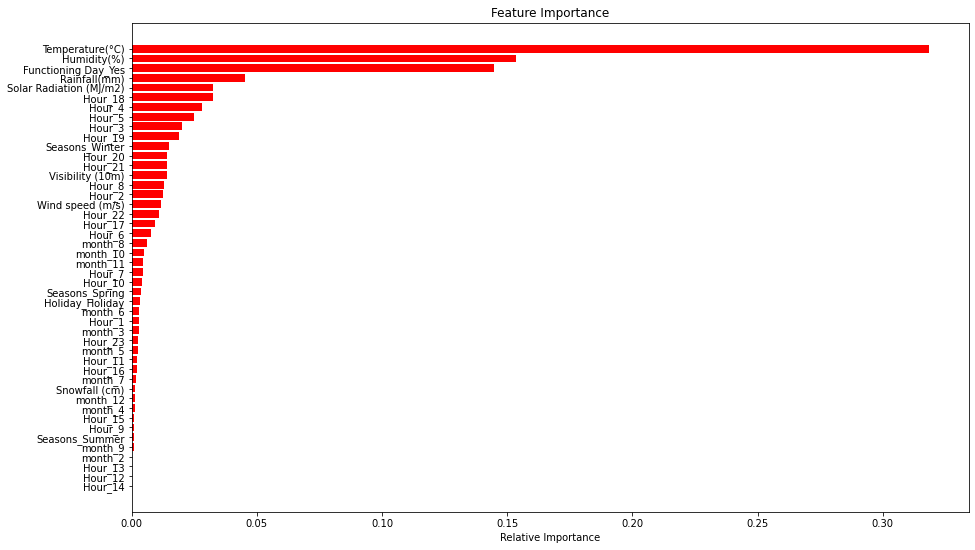

In [224]:
plt.figure(figsize=(15,9))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

In [225]:
from sklearn.ensemble import AdaBoostRegressor

In [227]:
param_grid = {'n_estimators':[5000, 3000], 'learning_rate':[0.0005, 0.001, 0.002]}
reg_abg = GridSearchCV(AdaBoostRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
reg_abg.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(random_state=42),
             param_grid={'learning_rate': [0.0005, 0.001, 0.002],
                         'n_estimators': [5000, 3000]},
             scoring='neg_mean_squared_error')

In [236]:
print("The best fit parameters is found out to be :" ,reg_abg.best_params_)
print("\nUsing ",reg_abg.best_params_, " neg_mean_squared_error is: ", reg_abg.best_score_)

The best fit parameters is found out to be : {'learning_rate': 0.002, 'n_estimators': 5000}

Using  {'learning_rate': 0.002, 'n_estimators': 5000}  neg_mean_squared_error is:  -57.90612090855977


In [228]:
reg_abg.best_estimator_

AdaBoostRegressor(learning_rate=0.002, n_estimators=5000, random_state=42)

In [229]:
reg_abg.best_estimator_.score(X_train,Y_train)

0.6276925384105844

In [231]:
y_predict_abg=reg_abg.predict(X_test)

In [232]:
r2_score(Y_test,y_predict_abg)

0.6113951822964492

In [233]:
MSE  = mean_squared_error((Y_test)**2, (y_predict_abg)**2)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((Y_test)**2, (y_predict_abg)**2)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((Y_test)**2, (y_predict_abg)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 197572.7250594777
RMSE : 444.4915354193797
R2 : 0.5262643348029364
Adjusted R2 :  0.5160954871132188


In [234]:
features = X_train.columns
importances = reg_abg.best_estimator_.feature_importances_
indices = np.argsort(importances)

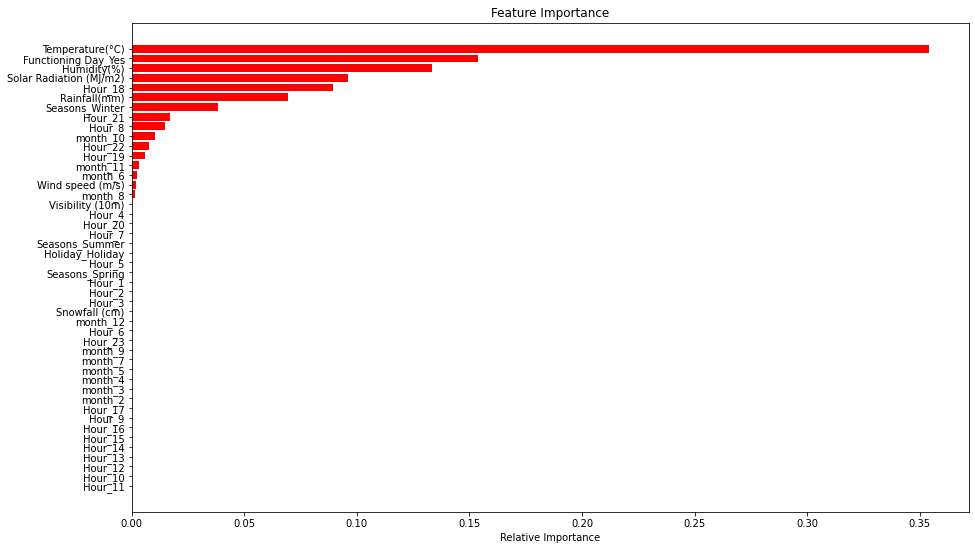

In [235]:
plt.figure(figsize=(15,9))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()